## Ukhem Fahmi Thoriqul Haq

### BPM with Pan-Tomkins Algorithm

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import find_peaks

### Make DataFrame ECG

In [2]:
df_ecg = pd.read_csv("ecg.txt")
print(df_ecg)

      -0.06
0    -0.065
1    -0.060
2    -0.075
3    -0.065
4    -0.070
...     ...
5994 -0.030
5995  0.015
5996  0.040
5997  0.070
5998  0.090

[5999 rows x 1 columns]


### Make DataFrame ECG with column name "ecg"

In [3]:
df_ecg = pd.read_csv("ecg.txt", names=["ecg"])
print(df_ecg)

        ecg
0    -0.060
1    -0.065
2    -0.060
3    -0.075
4    -0.065
...     ...
5995 -0.030
5996  0.015
5997  0.040
5998  0.070
5999  0.090

[6000 rows x 1 columns]


### Make DataFrame ECG with 2 columns

In [4]:
df_ecg.to_csv("df_ecg.csv", index=True, index_label="index")
df_ecg = pd.read_csv("df_ecg.csv")
print(df_ecg)

      index    ecg
0         0 -0.060
1         1 -0.065
2         2 -0.060
3         3 -0.075
4         4 -0.065
...     ...    ...
5995   5995 -0.030
5996   5996  0.015
5997   5997  0.040
5998   5998  0.070
5999   5999  0.090

[6000 rows x 2 columns]


### Define function of Pan-Tomkins Algorithm

In [5]:
#low-pass filter
def lpf(x):
    y = x.copy()
    
    for n in x.index:
        if(n < 13):
            continue
        y.iloc[n,1] = 2*y.iloc[n-1,1] - y.iloc[n-2,1] + x.iloc[n,1] - 2*x.iloc[n-6,1] + x.iloc[n-12,1] 
    return y


#high-pass filter
def hpf(x):
    y = x.copy()
    
    for n in x.index:
        if(n < 33):
            continue
        y.iloc[n,1] = y.iloc[n-1,1] - x.iloc[n,1]/32 + x.iloc[n-16,1] - x.iloc[n-17,1] + x.iloc[n-32,1]/32
    return y

#defivative of signal
def deriv(x):
    y = x.copy()

    for n in x.index:
        if(n < 4):
            continue
        y.iloc[n, 1] = (2*x.iloc[n,1] + x.iloc[n-1,1] - x.iloc[n-3,1] - 2*x.iloc[n-4,1])/4
    return y

#squarring the signal
def squaring(x):
    y = x.copy()

    for n in x.index:
        y.iloc[n,1] = x.iloc[n,1]**2
    return y

#integral of the signal for a moving window of ws size.
def win_sum(x, ws):
    y = x.copy()
    l = int(ws/5)
    
    for n in x.index:
        tmp_sum = 0

        if(n > 5998-l):
            break

        if(n < l):
            continue
        for j in range(n-l, n+l+1):
            tmp_sum += x.iloc[j,1]
        y.iloc[n,1] = tmp_sum/(l+1)
    return y

def detection(x):
    y = x.copy()

ecg = pd.read_csv('df_ecg.csv')

#Application of lpf
f1 = lpf(ecg)
#Application of hpf
f2 = hpf(f1)
#Application of the derivative
f3 = deriv(f2)
#squaring signal
f4 = squaring(f3)

window_size = 22 
f5 = win_sum(f4, window_size)

### Original Signal

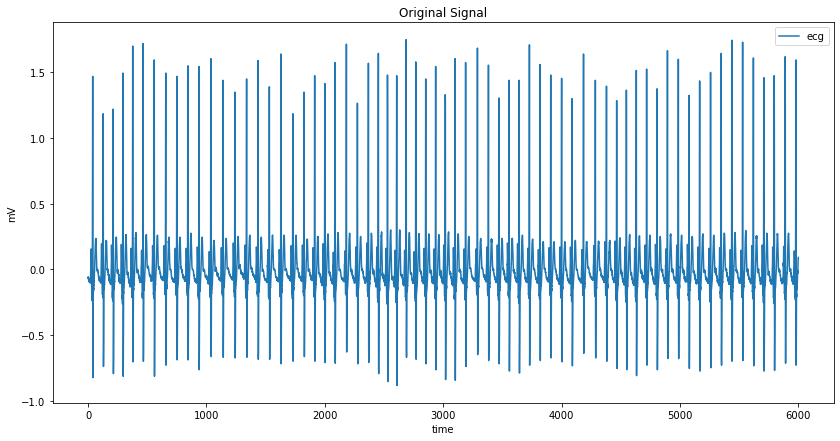

In [7]:
ecg.set_index('index').plot()
plt.rcParams["figure.figsize"] = (14,7)
plt.title('Original Signal')
plt.xlabel('time')
plt.ylabel('mV')
plt.savefig("ECG-Original.png")

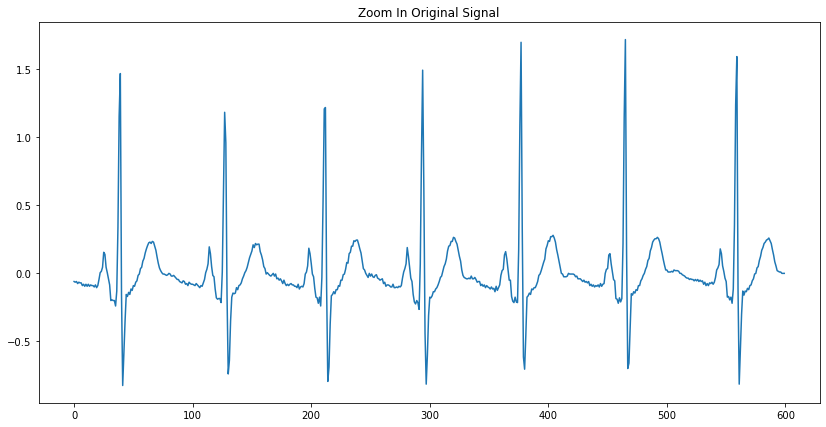

In [8]:
plt.plot(ecg[0:600]["ecg"])
plt.title('Zoom In Original Signal')
plt.savefig("ECG-Original-Zoom-In.png")

###  Bandpass Filtering (both high-pass and low-pass)

[]

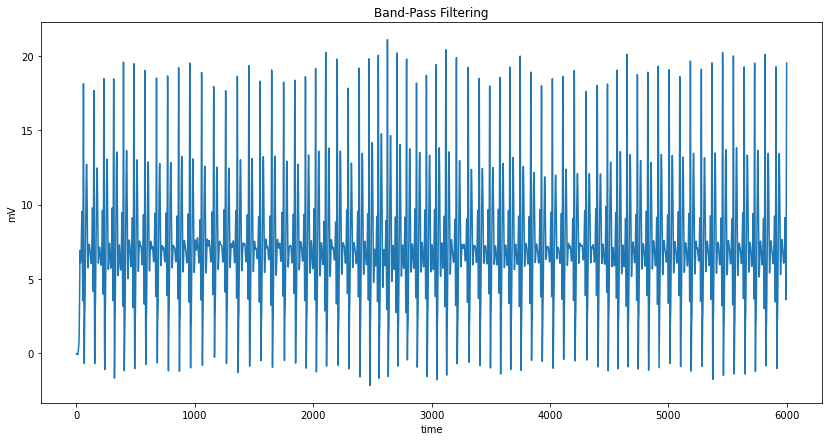

In [9]:
plt.plot(f2.iloc[:,0], f2.iloc[:,1])
plt.title('Band-Pass Filtering')
plt.xlabel('time')
plt.ylabel('mV')
plt.plot()

Text(0.5, 1.0, 'Zoom In Band-Pass Filtering')

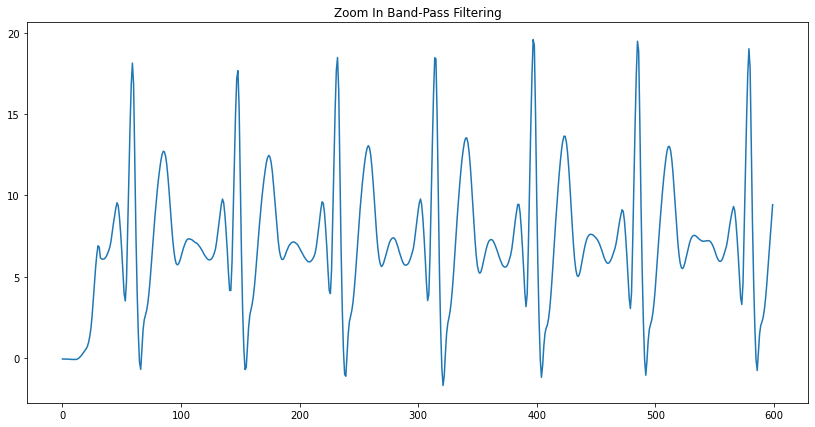

In [10]:
plt.plot(f2[0:600]["ecg"])
plt.title('Zoom In Band-Pass Filtering')

### Taking Derivative

Text(0, 0.5, 'mV')

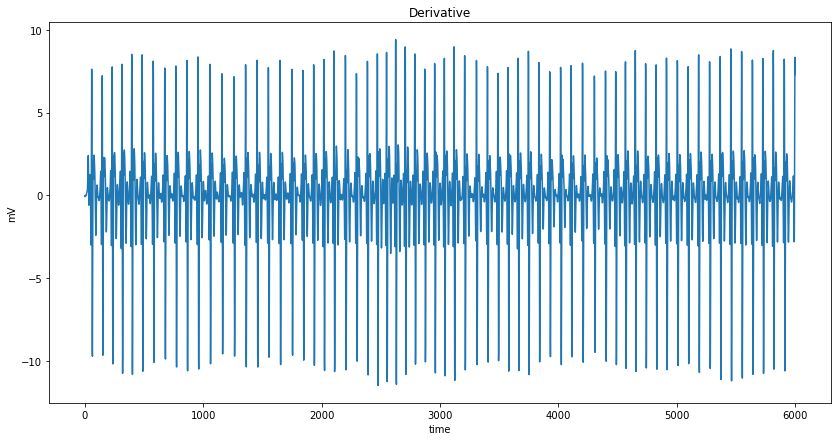

In [11]:
plt.plot(f3.iloc[:,0], f3.iloc[:,1])
plt.title('Derivative')
plt.xlabel('time')
plt.ylabel('mV')

Text(0.5, 1.0, 'Zoom In Derivative')

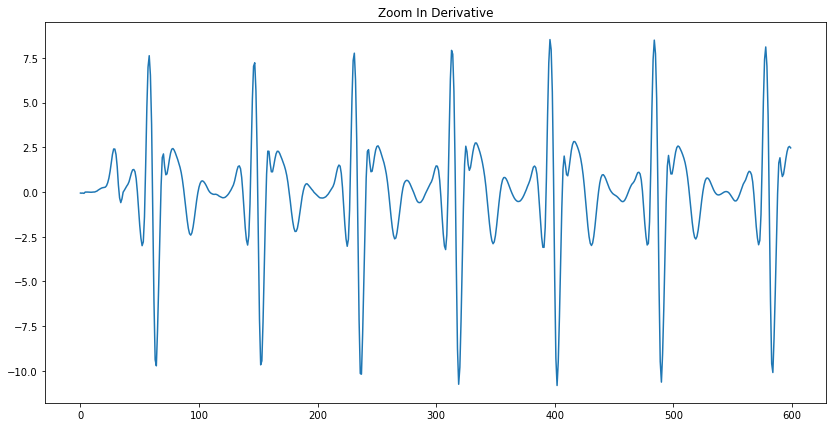

In [12]:
plt.plot(f3[0:600]["ecg"])
plt.title('Zoom In Derivative')

### Taking Squarring

Text(0, 0.5, 'mV')

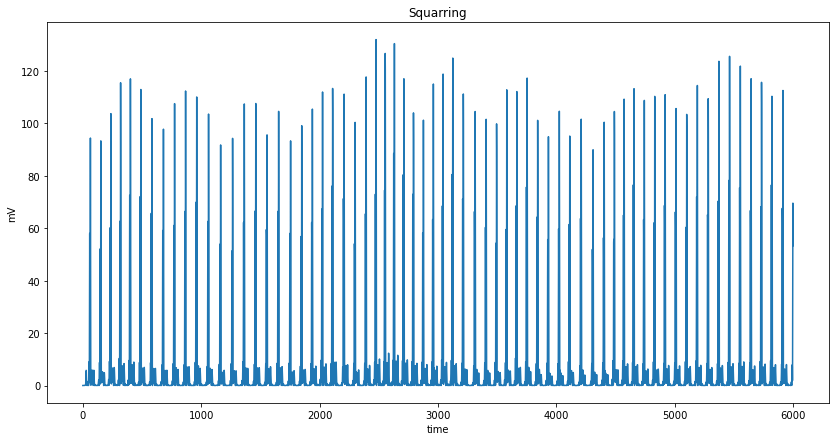

In [13]:
plt.plot(f4.iloc[:,0], f4.iloc[:,1])
plt.title('Squarring')
plt.xlabel('time')
plt.ylabel('mV')

Text(0.5, 1.0, 'Zoom In Squarring')

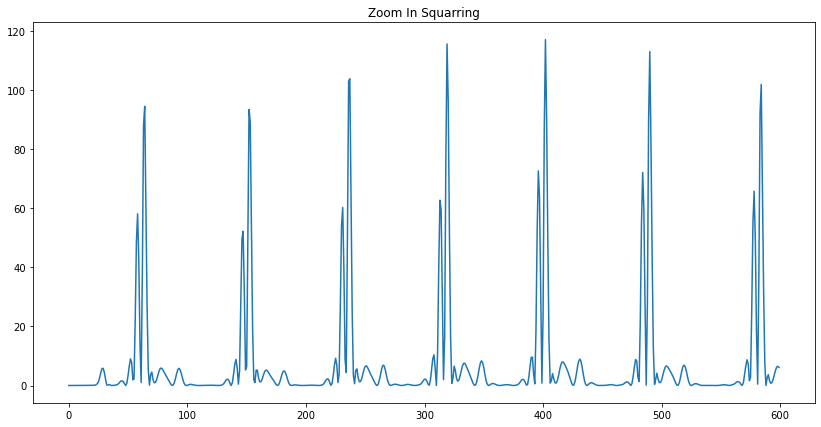

In [14]:
plt.plot(f4[0:600]["ecg"])
plt.title('Zoom In Squarring')

### Windowing

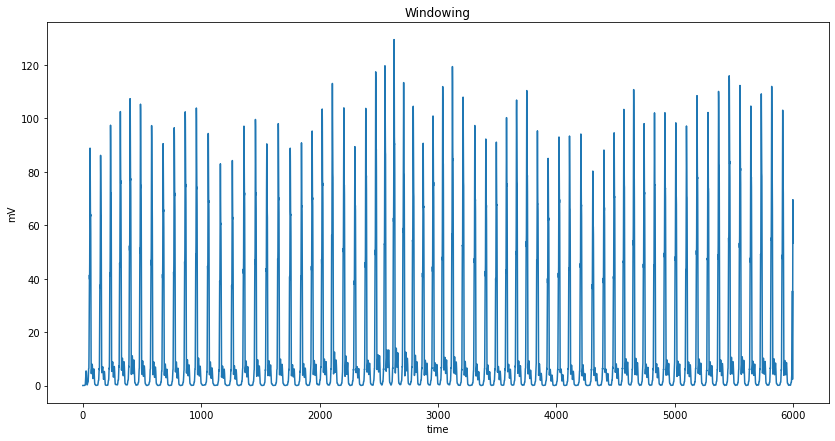

In [15]:
plt.plot(f5.iloc[:,0], f5.iloc[:,1])
plt.title('Windowing')
plt.xlabel('time')
plt.ylabel('mV')
plt.show()

Text(0.5, 1.0, 'Zoom In Windowing')

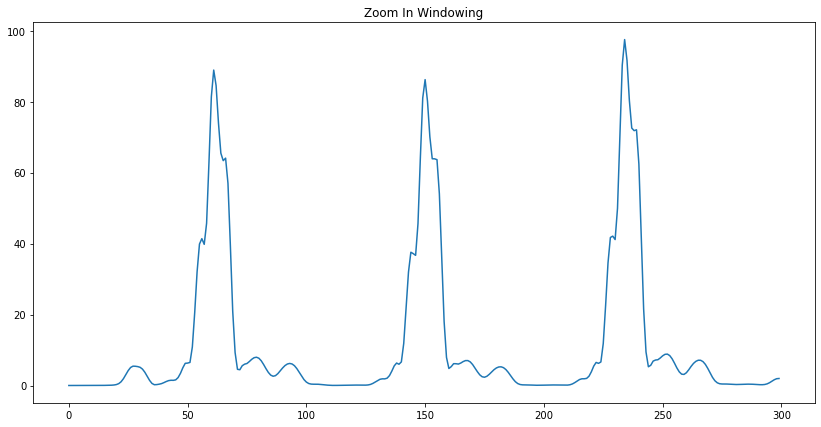

In [16]:
plt.plot(f5[0:300]["ecg"])
plt.title('Zoom In Windowing')

### Smoothing the Signal Again

In [17]:
filter_length = 4
moving_average = np.convolve(f5["ecg"], np.ones(filter_length), mode="same")
moving_average /= filter_length

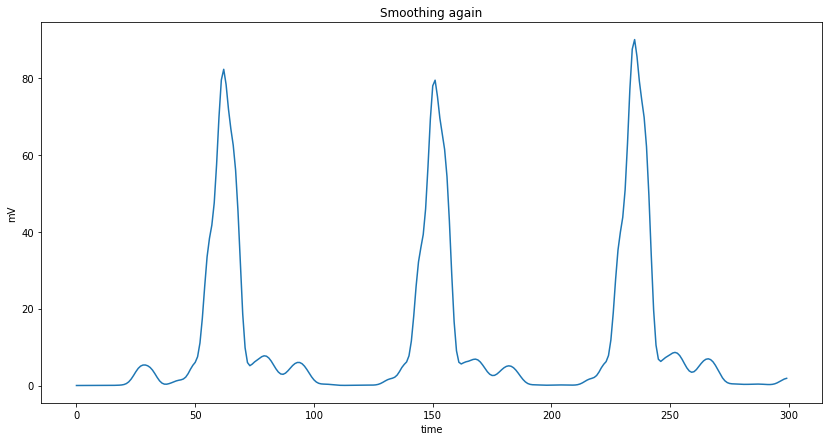

In [18]:
plt.plot(moving_average[0:300])
plt.title('Smoothing again')
plt.xlabel('time')
plt.ylabel('mV')
plt.show()

Text(0.5, 1.0, 'After vs Before Smoothing')

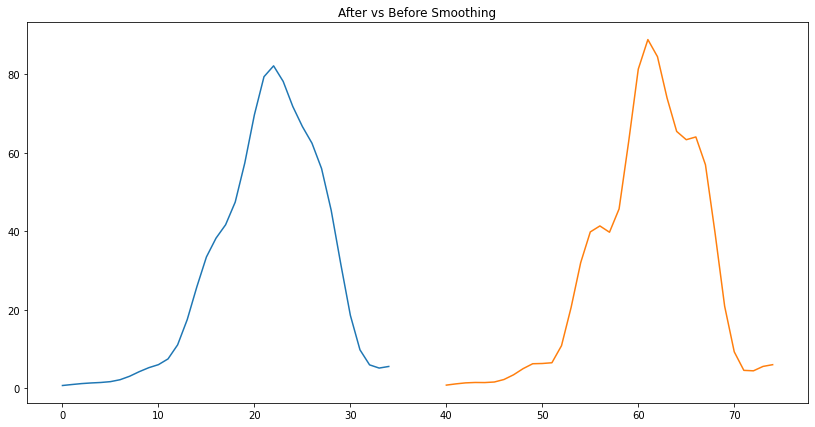

In [19]:
plt.plot(moving_average[40:75])
plt.plot(f5["ecg"][40:75])
plt.title('After vs Before Smoothing')

Signal after smoothing again ----------------------- Vs ------------------------ Signal before smoothing (only windowing)

### Find Peaks

In [20]:
def get_peaks(data):
    threshold = 60
    peaks_x = []
    for i in range(1, len(data)-1):
        if data[i] > threshold:
            if (data[i] > data[i-1] and data[i] > data[i+1]):
                peaks_x.append(i)
            
    peaks_y = [data[index] for index in peaks_x]
    return peaks_x, peaks_y

In [21]:
peaks_x, peaks_y = get_peaks(moving_average[0:6000])

<function matplotlib.pyplot.show(close=None, block=None)>

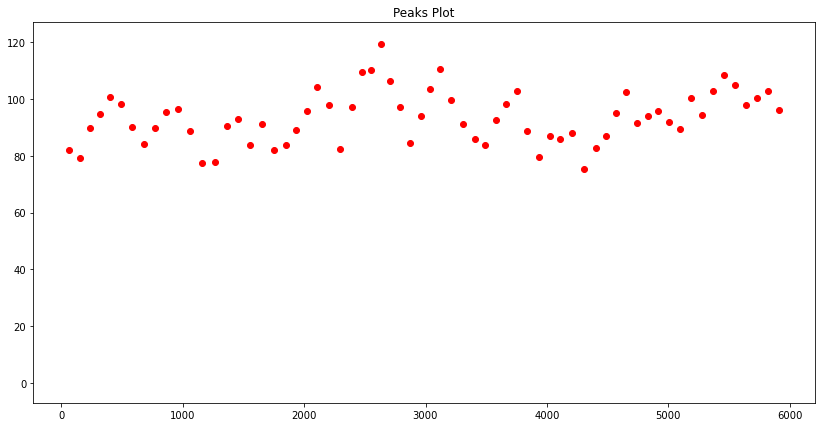

In [22]:
plt.plot(peaks_x, peaks_y,"ro")
plt.title('Peaks Plot')
plt.ylim(bottom=-7, top=127)
plt.show

### Put Peaks on signal

<function matplotlib.pyplot.show(close=None, block=None)>

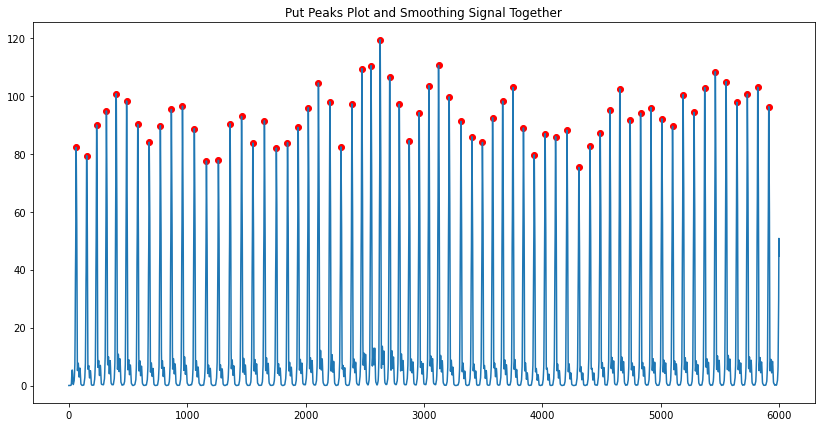

In [23]:
plt.plot(peaks_x, peaks_y, "ro")
plt.title('Put Peaks Plot and Smoothing Signal Together')
plt.plot(moving_average[0:6000])
plt.show

### All Peaks

In [24]:
print(peaks_x)

[62, 151, 235, 317, 400, 488, 582, 679, 773, 866, 960, 1060, 1162, 1263, 1362, 1459, 1554, 1652, 1753, 1847, 1937, 2023, 2108, 2205, 2299, 2391, 2475, 2553, 2630, 2710, 2791, 2875, 2959, 3041, 3123, 3212, 3312, 3405, 3494, 3580, 3665, 3751, 3840, 3931, 4023, 4112, 4208, 4308, 4402, 4489, 4571, 4654, 4741, 4830, 4917, 5009, 5100, 5189, 5281, 5371, 5461, 5552, 5643, 5732, 5820, 5912]


### Sum All Peaks or Find BPM

In [25]:
BPM = len(peaks_x)
print(f"BPM: {BPM}")

BPM: 66


<function matplotlib.pyplot.show(close=None, block=None)>

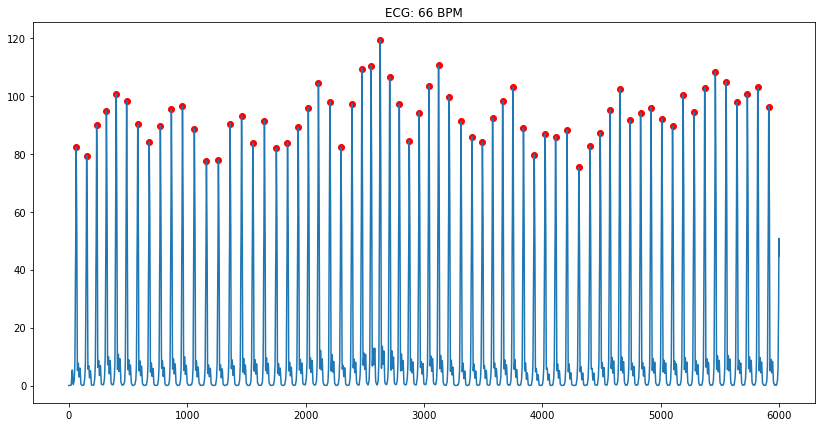

In [26]:
plt.plot(peaks_x, peaks_y, "ro")
plt.title(f"ECG: {BPM} BPM")
plt.plot(moving_average[0:6000])
plt.savefig("ECG-BPM-Chart.png")
plt.show